In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load the dataset
file_path = 'GOOG.csv'  # Make sure the file is in the same directory as this script
df = pd.read_csv(file_path)
df.head(10)

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,19-08-2004,2.390042,2.490664,897427216,2.591785,2.499133,2.499133
1,20-08-2004,2.503118,2.515820,458857488,2.716817,2.697639,2.697639
2,23-08-2004,2.716070,2.758411,366857939,2.826406,2.724787,2.724787
3,24-08-2004,2.579581,2.770615,306396159,2.779581,2.611960,2.611960
4,25-08-2004,2.587302,2.614201,184645512,2.689918,2.640104,2.640104
5,26-08-2004,2.606729,2.613952,142572401,2.688672,2.687676,2.687676
6,27-08-2004,2.632383,2.692408,124826132,2.705360,2.643840,2.643840
7,30-08-2004,2.540727,2.622171,104429967,2.627402,2.540727,2.540727
8,31-08-2004,2.544463,2.547950,98825037,2.583068,2.549693,2.549693
9,01-09-2004,2.482445,2.557912,183633734,2.564637,2.496891,2.496891


In [5]:
df.describe()

,Low,Open,Volume,High,Close,Adjusted Close
count,4612.000000,4612.000000,4.612000e+03,4612.000000,4612.000000,4612.000000
mean,37.088474,37.471847,1.238896e+08,37.856624,37.477273,37.477273
std,34.791176,35.163155,1.536223e+08,35.549294,35.170034,35.170034
min,2.390042,2.470490,1.584340e+05,2.534002,2.490913,2.490913
25%,12.401765,12.575302,2.992850e+07,12.697718,12.576174,12.576174
50%,22.808758,22.980115,6.869051e+07,23.098795,22.954461,22.954461
75%,52.975875,53.578501,1.549155e+08,54.106961,53.534375,53.534375
max,149.887497,151.863495,1.650833e+09,152.100006,150.709000,150.709000


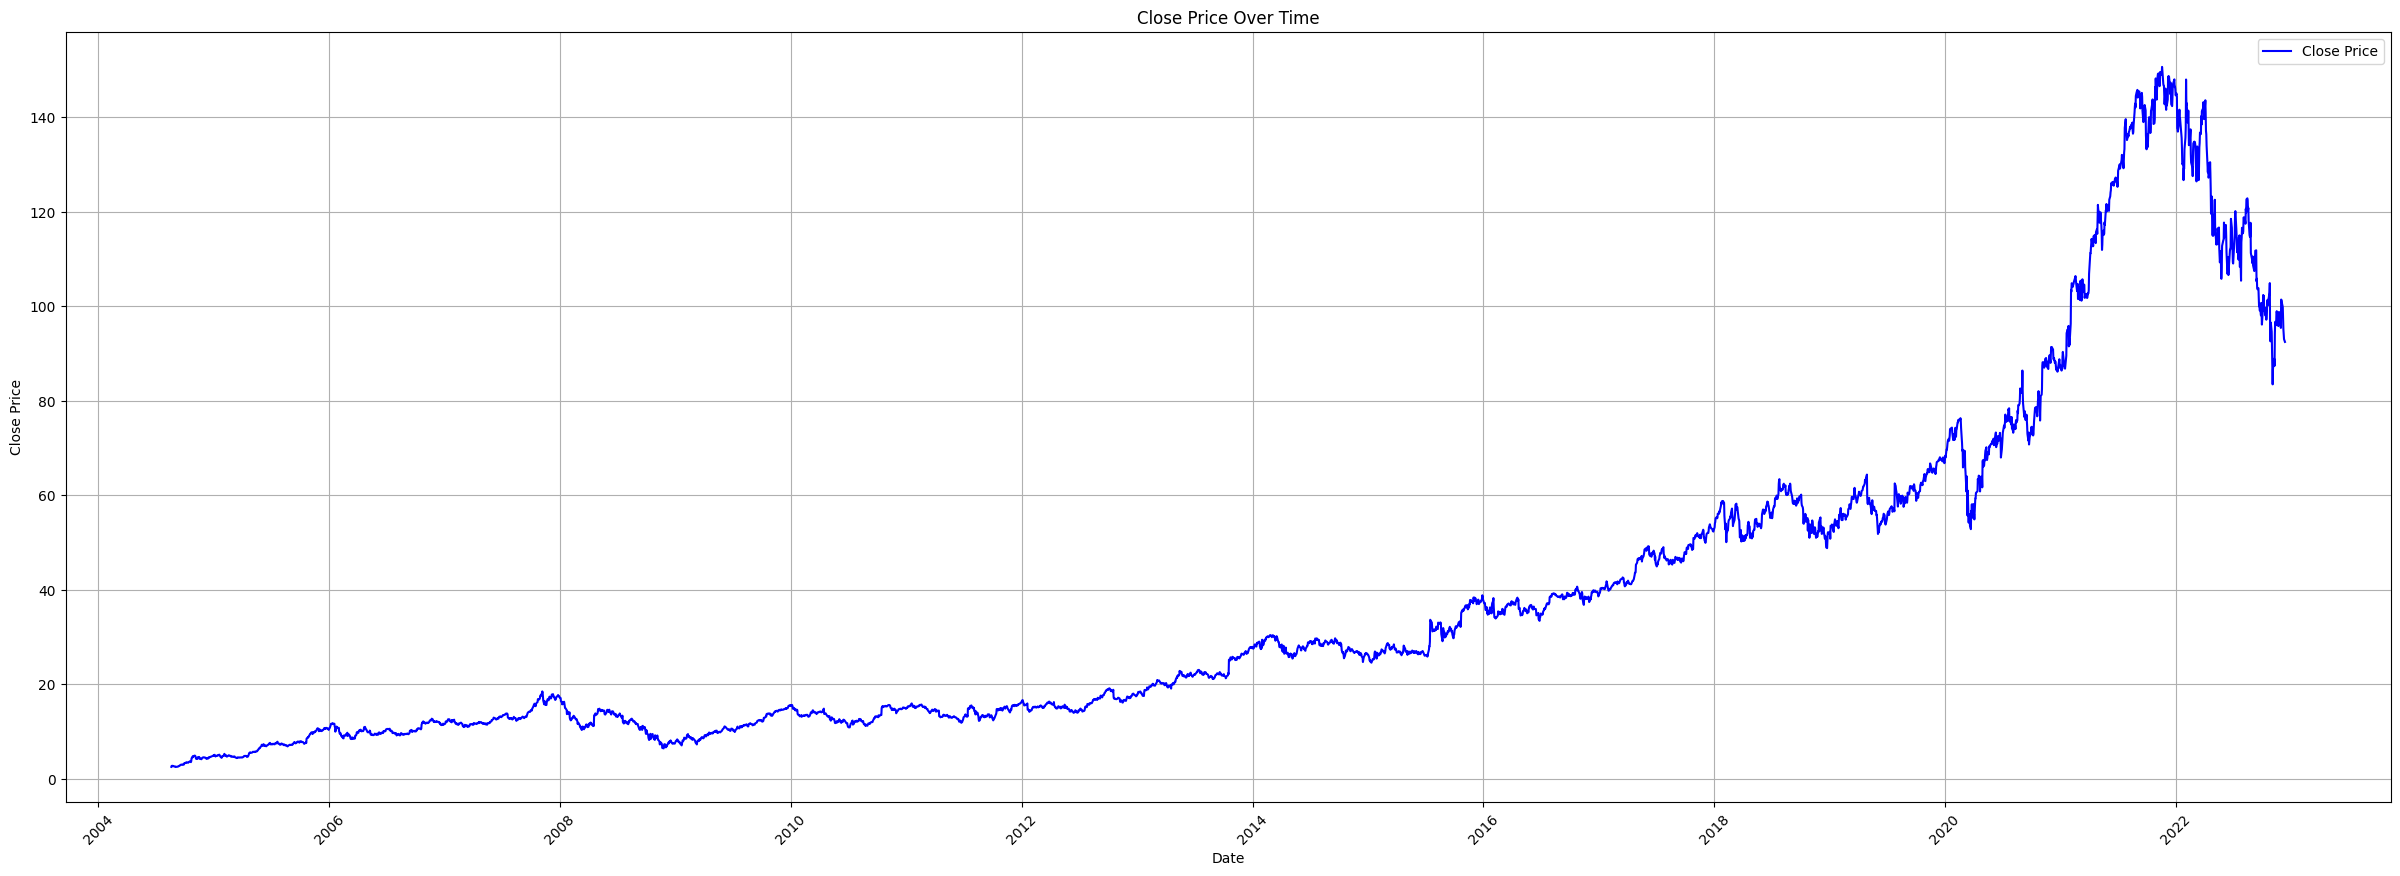

In [12]:
import matplotlib.pyplot as plt

# Ensure the 'Date' column is converted to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plot the Close Price over time
plt.figure(figsize=(30, 10))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)  
plt.legend()
plt.grid(True)
plt.show()


##SPLITTING

In [13]:
import pandas as pd
import numpy as np

# Assuming the dataframe is already loaded and preprocessed as `df`

# Converting DataFrame to numpy array for splitting
dataset = df.values  # Replace 'df' with your DataFrame variable if named differently

# Calculate the split indices
train_size = int(len(dataset) * 0.7)
val_size = int(len(dataset) * 0.15)
test_size = len(dataset) - train_size - val_size

# Sequential splits
train_data = dataset[:train_size]
val_data = dataset[train_size:train_size + val_size]
test_data = dataset[train_size + val_size:]

# Print the shapes to verify
print(f"Training data shape: {train_data.shape}")
print(f"Validation data shape: {val_data.shape}")
print(f"Testing data shape: {test_data.shape}")


Training data shape: (3228, 7)
Validation data shape: (691, 7)
Testing data shape: (693, 7)


scalingg

In [16]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Initialize scalers
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Function to scale features and targets
def scale_data(X, y, scaler_X, scaler_y):
    # Scale features
    X_scaled = scaler_X.fit_transform(X.reshape(-1, X.shape[2])).reshape(X.shape)
    # Scale target
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))
    return X_scaled, y_scaled

# Create time-series data
X_train, y_train = create_time_series(train_data, look_back, predict_forward)
X_val, y_val = create_time_series(val_data, look_back, predict_forward)
X_test, y_test = create_time_series(test_data, look_back, predict_forward)

# Scale the data
X_train_scaled, y_train_scaled = scale_data(X_train, y_train, scaler_X, scaler_y)
X_val_scaled = scaler_X.transform(X_val.reshape(-1, X_val.shape[2])).reshape(X_val.shape)
y_val_scaled = scaler_y.transform(y_val.reshape(-1, 1))
X_test_scaled = scaler_X.transform(X_test.reshape(-1, X_test.shape[2])).reshape(X_test.shape)
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Verify the shapes
print(f"X_train_scaled shape: {X_train_scaled.shape}, y_train_scaled shape: {y_train_scaled.shape}")
print(f"X_val_scaled shape: {X_val_scaled.shape}, y_val_scaled shape: {y_val_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}, y_test_scaled shape: {y_test_scaled.shape}")


X_train_scaled shape: (3198, 30, 5), y_train_scaled shape: (3198, 1)
X_val_scaled shape: (661, 30, 5), y_val_scaled shape: (661, 1)
X_test_scaled shape: (663, 30, 5), y_test_scaled shape: (663, 1)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

# Define the step_size (look_back) if not already defined
step_size = look_back  # Number of time steps in each input sequence

# Build the RNN model
model_rnn = Sequential([
    # First RNN layer with 64 units and return_sequences=True
    SimpleRNN(64, return_sequences=True, input_shape=(step_size, X_train_scaled.shape[2])),
    Dropout(0.2),  # Dropout to prevent overfitting

    # Second RNN layer with 64 units and return_sequences=False
    SimpleRNN(64, return_sequences=False),
    Dropout(0.2),  # Dropout to prevent overfitting

    # Fully connected dense layers
    Dense(32, activation='relu'),  # Dense layer with ReLU activation
    Dense(1)  # Output layer predicting the 'Close' price
])

# Compile the model
model_rnn.compile(optimizer='adam', loss='huber', metrics=['mae'])

# Print the model summary
model_rnn.summary()


/Users/work/Library/Python/3.10/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)        │ (None, 30, 64)         │         4,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,849 (58.00 KB)

 Trainable params: 14,849 (58.00 KB)

 Non-trainable params: 0 (0.00 B)

baseline rnn

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

# Define the Vanilla RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(look_back, X_train_scaled.shape[2])),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_scaled, y_val_scaled),
    verbose=1
)

# Evaluate the model on test data
test_loss, test_mae = model.evaluate(X_test_scaled, y_test_scaled)
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Predict the scaled test data
y_pred_scaled = model.predict(X_test_scaled)


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0012 - mae: 0.0220 - val_loss: 7.6482e-04 - val_mae: 0.0208
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4419e-04 - mae: 0.0086 - val_loss: 7.3454e-04 - val_mae: 0.0204
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1125e-04 - mae: 0.0077 - val_loss: 6.4468e-04 - val_mae: 0.0186
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0710e-04 - mae: 0.0074 - val_loss: 7.5224e-04 - val_mae: 0.0215
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0611e-04 - mae: 0.0071 - val_loss: 5.7630e-04 - val_mae: 0.0174
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0259e-04 - mae: 0.0071 - val_loss: 5.7892e-04 - val_mae: 0.0168
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8218e-05 - mae: 0.0065 - val_loss: 6.5173e-04 - val_mae: 0.0198
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5436e-05 - mae: 0.0060 - val_loss: 5.2196e-04 - val_mae: 0.0

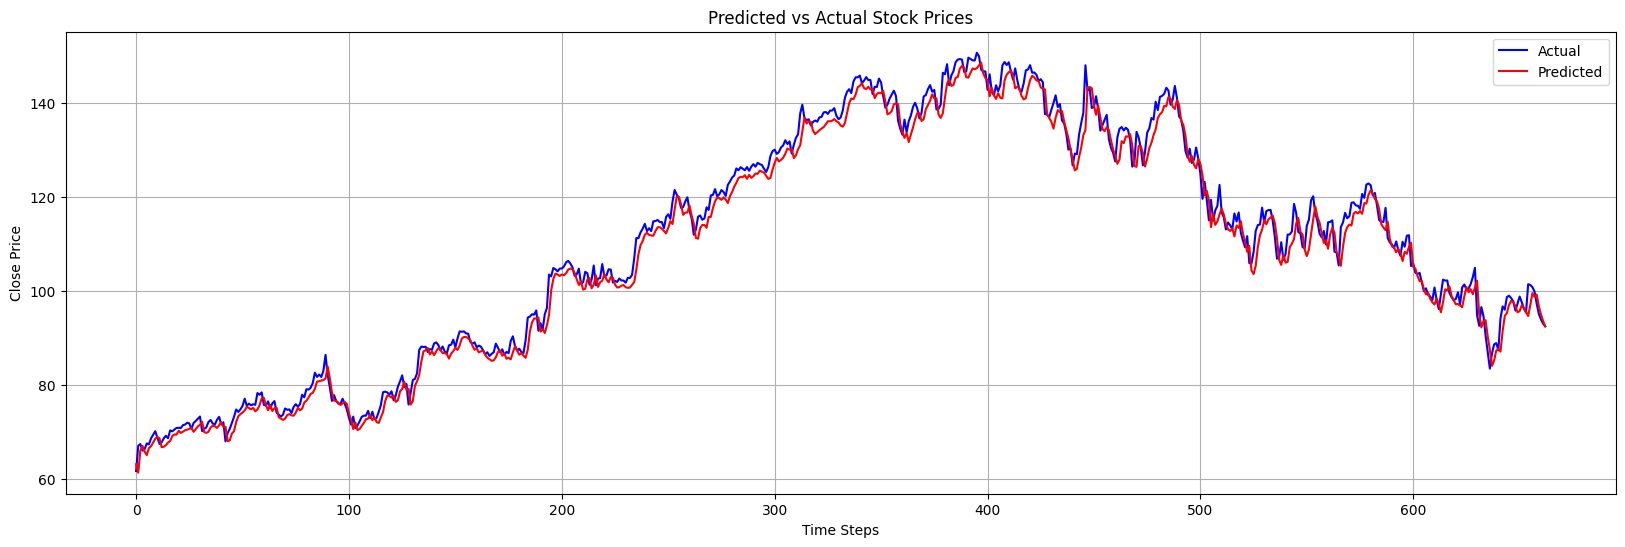

In [21]:
import matplotlib.pyplot as plt

# Inverse-transform the predictions and actual values to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test_scaled)

# Plot predictions vs actual values
plt.figure(figsize=(20, 6))
plt.plot(y_test_actual, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Predicted vs Actual Stock Prices')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


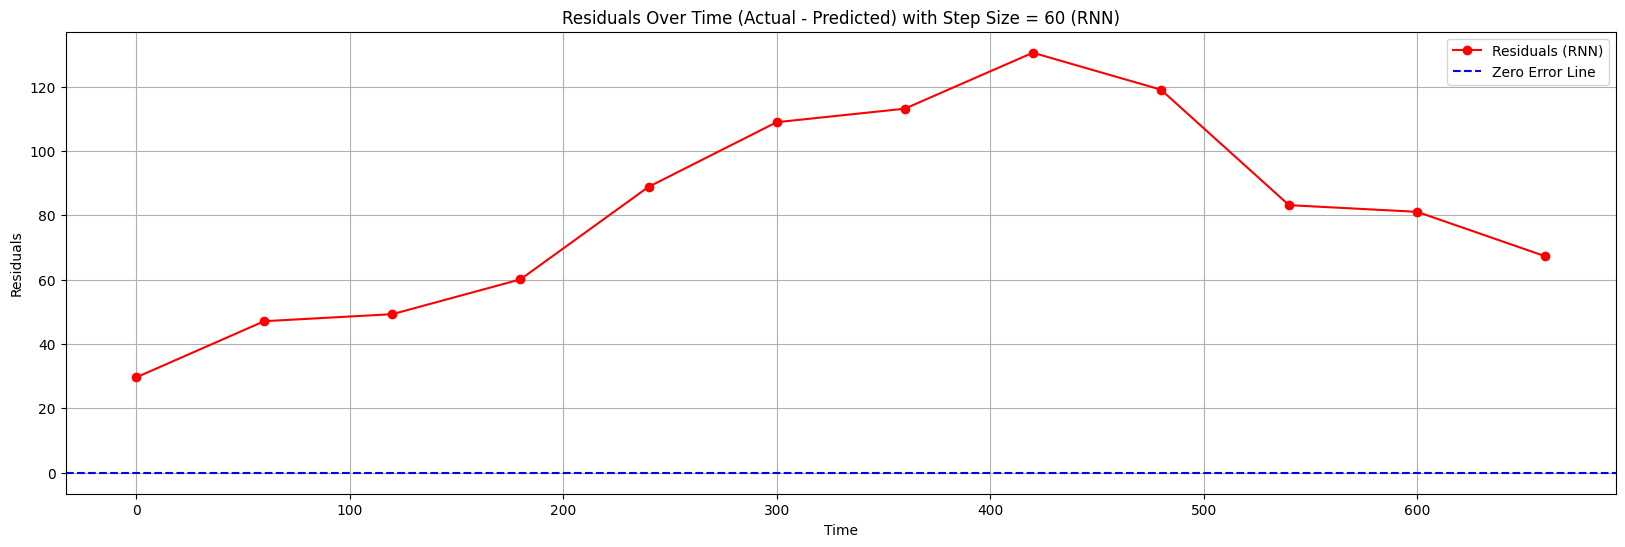

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure predictions and actual values are in original scale
y_pred_scaled = model_rnn.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test_scaled)

# Calculate residuals (Actual - Predicted)
residuals = y_test_actual - y_pred

# Plot residuals over time with step size 60
plt.figure(figsize=(20, 6))
time_steps = np.arange(0, len(residuals), step=60)  # Select every 60th time step
plt.plot(time_steps, residuals[::60], label='Residuals (RNN)', color='red', marker='o', linestyle='-')
plt.axhline(0, color='blue', linestyle='--', linewidth=1.5, label='Zero Error Line')  # Horizontal line at zero
plt.title('Residuals Over Time (Actual - Predicted) with Step Size = 60 (RNN)')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()


### baseline lstm

In [44]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Define input features and target
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'
data_features = df[features].values
data_target = df[target].values

# Create sequences
N = 100  # Input sequence length (past 60 days)
M = 1   # Predicting 1 day ahead
def create_sequences(data_features, data_target, N, M):
    X, y = [], []
    for i in range(len(data_features) - N - M + 1):
        X.append(data_features[i:i + N])  # Past N days
        y.append(data_target[i + N:i + N + M])  # Next M days
    return np.array(X), np.array(y)

X_lstm, y_lstm = create_sequences(data_features, data_target, N, M)

# Perform chronological split
train_size = int(0.7 * len(X_lstm))
val_size = int(0.15 * len(X_lstm))

X_train_lstm = X_lstm[:train_size]
y_train_lstm = y_lstm[:train_size]
X_val_lstm = X_lstm[train_size:train_size + val_size]
y_val_lstm = y_lstm[train_size:train_size + val_size]
X_test_lstm = X_lstm[train_size + val_size:]
y_test_lstm = y_lstm[train_size + val_size:]

# Initialize scalers
scaler_X_lstm = MinMaxScaler()
scaler_y_lstm = MinMaxScaler()

# Scale features
X_train_scaled = scaler_X_lstm.fit_transform(X_train_lstm.reshape(-1, X_train_lstm.shape[2])).reshape(X_train_lstm.shape)
X_val_scaled = scaler_X_lstm.transform(X_val_lstm.reshape(-1, X_val_lstm.shape[2])).reshape(X_val_lstm.shape)
X_test_scaled = scaler_X_lstm.transform(X_test_lstm.reshape(-1, X_test_lstm.shape[2])).reshape(X_test_lstm.shape)




# Scale target
y_train_scaled = scaler_y_lstm.fit_transform(y_train_lstm.reshape(-1, 1))
y_val_scaled = scaler_y_lstm.transform(y_val_lstm.reshape(-1, 1))
y_test_scaled = scaler_y_lstm.transform(y_test_lstm.reshape(-1, 1))


In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model_lstm = Sequential([
    # First LSTM layer with 128 units and return_sequences=True
    LSTM(128, return_sequences=True, input_shape=(N, X_train_scaled.shape[2])),
    Dropout(0.3),  # Dropout to reduce overfitting

    # Second LSTM layer with 128 units and return_sequences=False
    LSTM(128, return_sequences=False),
    Dropout(0.3),  # Dropout to reduce overfitting

    # Fully connected dense layers
    Dense(32, activation='relu'),  # Dense layer with ReLU activation
    Dense(1)  # Output layer predicting the 'Close' price
])

# Compile the model
model_lstm.compile(
    optimizer='SGD',  # Adam optimizer for efficient training
    loss='huber',      # Huber loss for regression (robust to outliers)
    metrics=['mae']    # Mean Absolute Error (MAE) as a performance metric
)

# Display the model summary
model_lstm.summary()


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_32 (LSTM)                  │ (None, 100, 128)       │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_33 (LSTM)                  │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,841 (796.25 KB)

 Trainable params: 203,841 (796.25 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Stop training after 5 epochs without improvement
    restore_best_weights=True
)

# Train the model
history_lstm = model_lstm.fit(
    X_train_scaled, y_train_scaled,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_scaled, y_val_scaled),
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - loss: 0.0408 - mae: 0.2035 - val_loss: 0.1817 - val_mae: 0.5905
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 0.0119 - mae: 0.1264 - val_loss: 0.1060 - val_mae: 0.4486
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - loss: 0.0067 - mae: 0.0916 - val_loss: 0.0605 - val_mae: 0.3348
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - loss: 0.0035 - mae: 0.0631 - val_loss: 0.0368 - val_mae: 0.2567
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 0.0024 - mae: 0.0498 - val_loss: 0.0240 - val_mae: 0.2022
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - loss: 0.0019 - mae: 0.0428 - val_loss: 0.0189 - val_mae: 0.1763
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - loss: 0.0015 - mae: 0.0382 - val_loss: 0.0149 - val_mae: 0.1531
Epoch 8/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - loss: 0.0014 - mae: 0.0364 - val_loss: 0.0145 - val_mae: 0.1513
Epoch 9/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0393 - mae: 0.1892
LSTM Test Loss: 0.0665, Test MAE: 0.2877
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


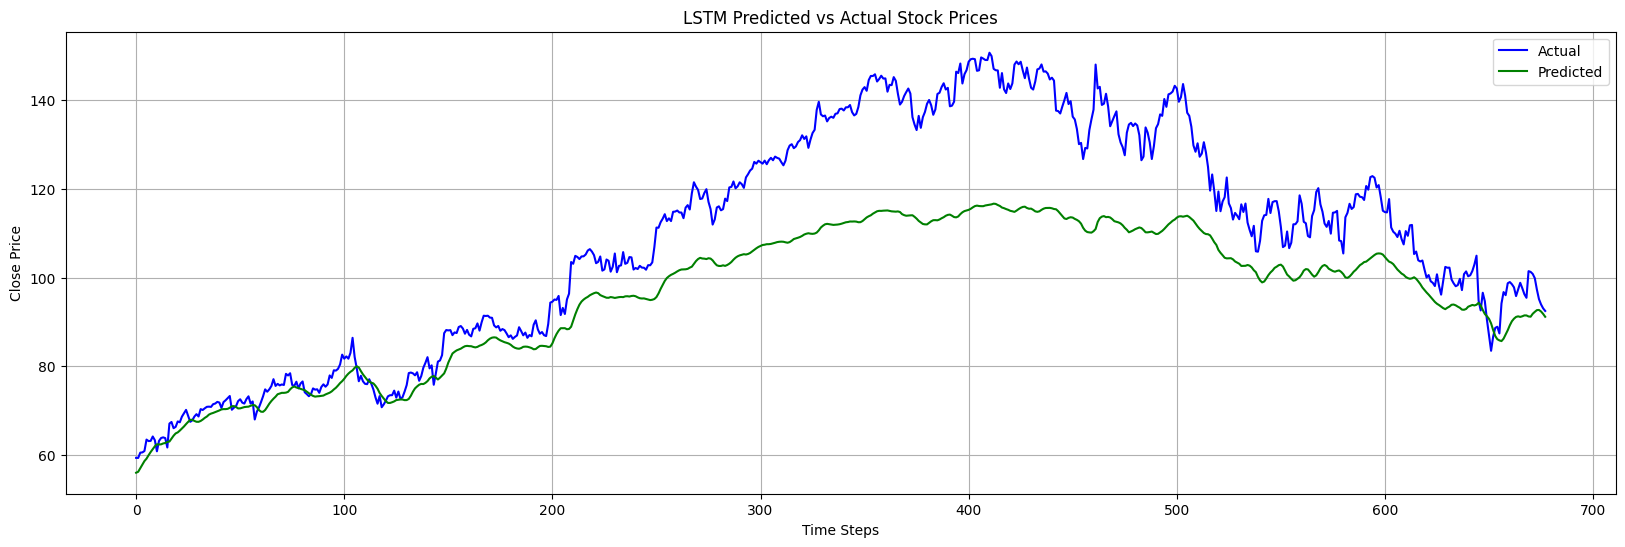

In [57]:
# Evaluate the model on the test set
test_loss_lstm, test_mae_lstm = model_lstm.evaluate(X_test_scaled, y_test_scaled)
print(f"LSTM Test Loss: {test_loss_lstm:.4f}, Test MAE: {test_mae_lstm:.4f}")

# Predict on the test set
y_pred_lstm_scaled = model_lstm.predict(X_test_scaled)
y_pred_lstm = scaler_y_lstm.inverse_transform(y_pred_lstm_scaled)

# Plot predicted vs actual values
y_test_actual_lstm = scaler_y_lstm.inverse_transform(y_test_scaled)

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(y_test_actual_lstm, label='Actual', color='blue')
plt.plot(y_pred_lstm, label='Predicted', color='green')
plt.title('LSTM Predicted vs Actual Stock Prices')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


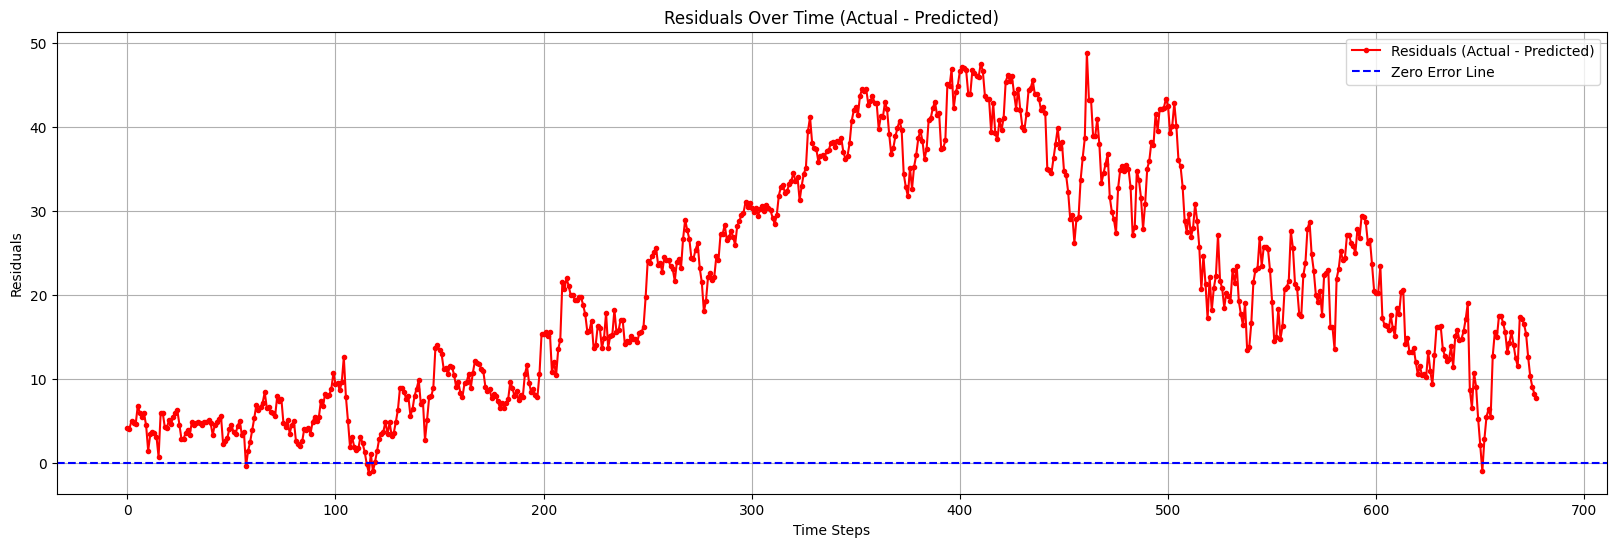

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure predictions are made and inverse transform is applied
y_pred_scaled = model_lstm.predict(X_test_scaled)
y_pred = scaler_y_lstm.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y_lstm.inverse_transform(y_test_scaled)

# Calculate residuals (Actual - Predicted)
residuals = y_test_actual - y_pred

# Plot residuals over time
plt.figure(figsize=(20, 6))
plt.plot(residuals, label='Residuals (Actual - Predicted)', color='red', linestyle='-', marker='o', markersize=3)
plt.axhline(0, color='blue', linestyle='--', linewidth=1.5, label='Zero Error Line')  # Horizontal line at zero
plt.title('Residuals Over Time (Actual - Predicted)')
plt.xlabel('Time Steps')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()


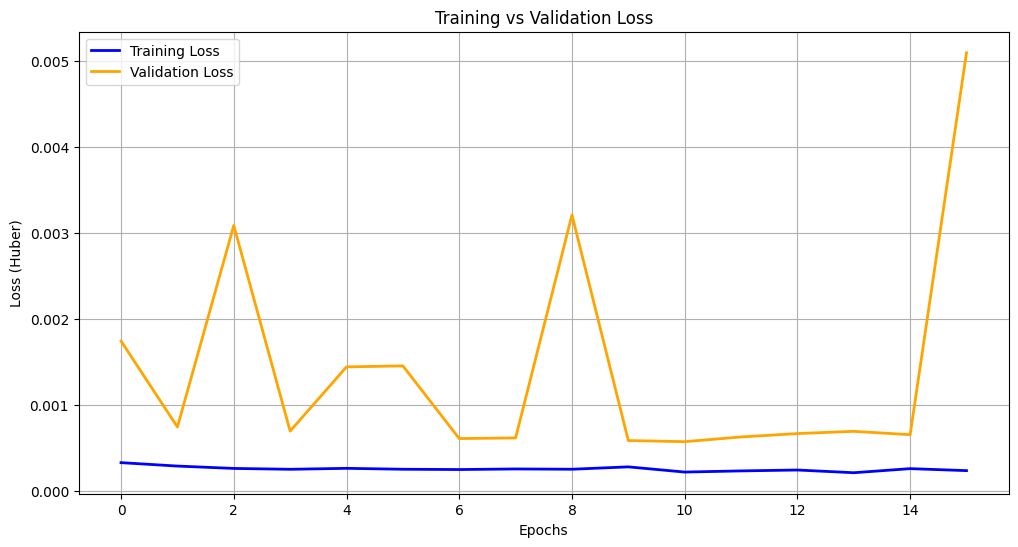

In [58]:
# Plot training vs validation loss
plt.figure(figsize=(12, 6))
plt.plot(history_lstm.history['loss'], label='Training Loss', color='blue', linewidth=2)
plt.plot(history_lstm.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Huber)')
plt.legend()
plt.grid(True)
plt.show()


### modified lstm

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model_lstm = Sequential([
    # First LSTM layer with 128 units and return_sequences=True
    LSTM(256, return_sequences=True, input_shape=(N, X_train_scaled.shape[2])),
    Dropout(0.3),  # Dropout to reduce overfitting

    # Second LSTM layer with 128 units and return_sequences=False
    LSTM(256, return_sequences=False),
    Dropout(0.3),  # Dropout to reduce overfitting


    # Fully connected dense layers
    Dense(128, activation='relu'),  # Dense layer with ReLU activation
    Dense(1)  # Output layer predicting the 'Close' price
])

# Compile the model
model_lstm.compile(
    optimizer='Adam',  # Adam optimizer for efficient training
    loss='huber',      # Huber loss for regression (robust to outliers)
    metrics=['mae']    # Mean Absolute Error (MAE) as a performance metric
)

# Display the model summary
model_lstm.summary()

/Users/work/Library/Python/3.10/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_36 (LSTM)                  │ (None, 100, 256)       │       267,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_37 (LSTM)                  │ (None, 256)            │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 825,601 (3.15 MB)

 Trainable params: 825,601 (3.15 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Stop training after 5 epochs without improvement
    restore_best_weights=True
)

# Train the model
history_lstm = model_lstm.fit(
    X_train_scaled, y_train_scaled,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_scaled, y_val_scaled),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 24s 227ms/step - loss: 0.0094 - mae: 0.0800 - val_loss: 0.0014 - val_mae: 0.0420
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 21s 217ms/step - loss: 4.9591e-04 - mae: 0.0217 - val_loss: 0.0015 - val_mae: 0.0442
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 21s 216ms/step - loss: 4.6437e-04 - mae: 0.0208 - val_loss: 0.0032 - val_mae: 0.0709
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 21s 215ms/step - loss: 3.7373e-04 - mae: 0.0191 - val_loss: 9.7721e-04 - val_mae: 0.0347
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 25s 248ms/step - loss: 3.9300e-04 - mae: 0.0192 - val_loss: 0.0012 - val_mae: 0.0399
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 24s 245ms/step - loss: 3.4386e-04 - mae: 0.0177 - val_loss: 0.0050 - val_mae: 0.0925
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 25s 251ms/step - loss: 3.6548e-04 - mae: 0.0181 - val_loss: 0.0012 - val_mae: 0.0405
Epoch 8/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 26s 260ms/step - loss: 2.9429e-04 - mae: 0.0163 - val_loss: 0.0022 - val_mae: 0.0578
Epoch 9/

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0319 - mae: 0.1905
LSTM Test Loss: 0.0512, Test MAE: 0.2663
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step


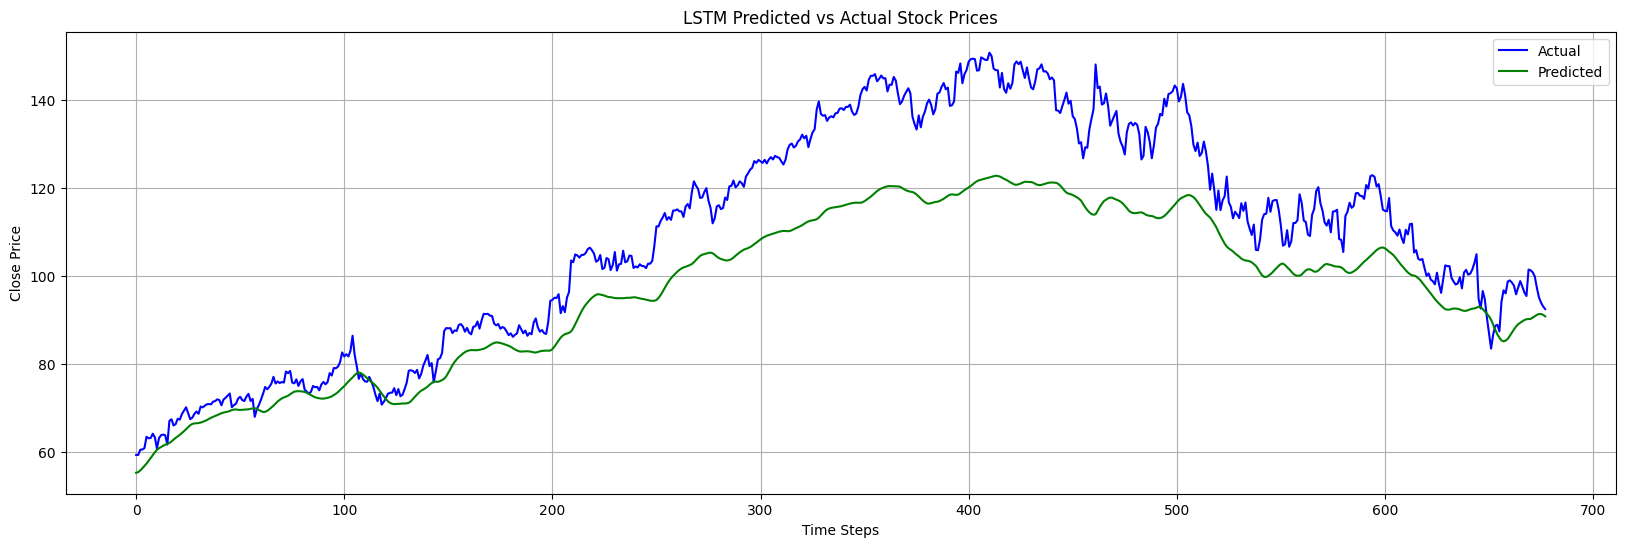

In [72]:
# Evaluate the model on the test set
test_loss_lstm, test_mae_lstm = model_lstm.evaluate(X_test_scaled, y_test_scaled)
print(f"LSTM Test Loss: {test_loss_lstm:.4f}, Test MAE: {test_mae_lstm:.4f}")

# Predict on the test set
y_pred_lstm_scaled = model_lstm.predict(X_test_scaled)
y_pred_lstm = scaler_y_lstm.inverse_transform(y_pred_lstm_scaled)

# Plot predicted vs actual values
y_test_actual_lstm = scaler_y_lstm.inverse_transform(y_test_scaled)

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(y_test_actual_lstm, label='Actual', color='blue')
plt.plot(y_pred_lstm, label='Predicted', color='green')
plt.title('LSTM Predicted vs Actual Stock Prices')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step


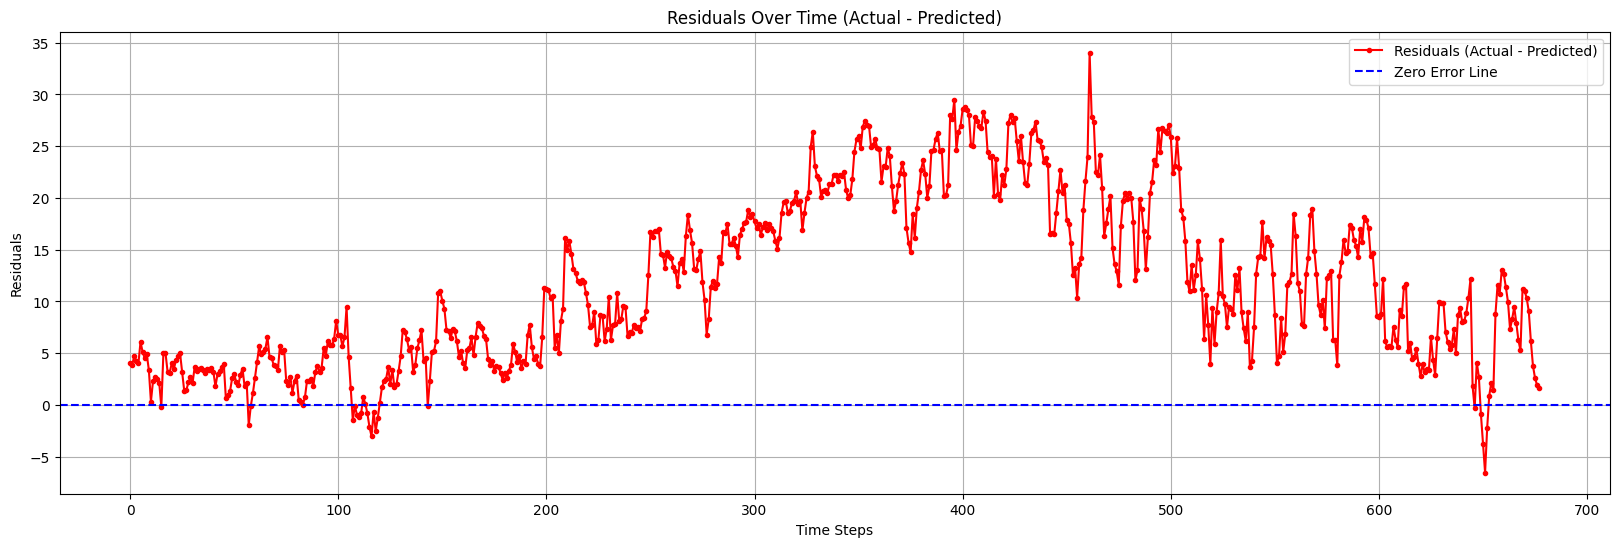

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure predictions are made and inverse transform is applied
y_pred_scaled = model_lstm.predict(X_test_scaled)
y_pred = scaler_y_lstm.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y_lstm.inverse_transform(y_test_scaled)

# Calculate residuals (Actual - Predicted)
residuals = y_test_actual - y_pred

# Plot residuals over time
plt.figure(figsize=(20, 6))
plt.plot(residuals, label='Residuals (Actual - Predicted)', color='red', linestyle='-', marker='o', markersize=3)
plt.axhline(0, color='blue', linestyle='--', linewidth=1.5, label='Zero Error Line')  # Horizontal line at zero
plt.title('Residuals Over Time (Actual - Predicted)')
plt.xlabel('Time Steps')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()


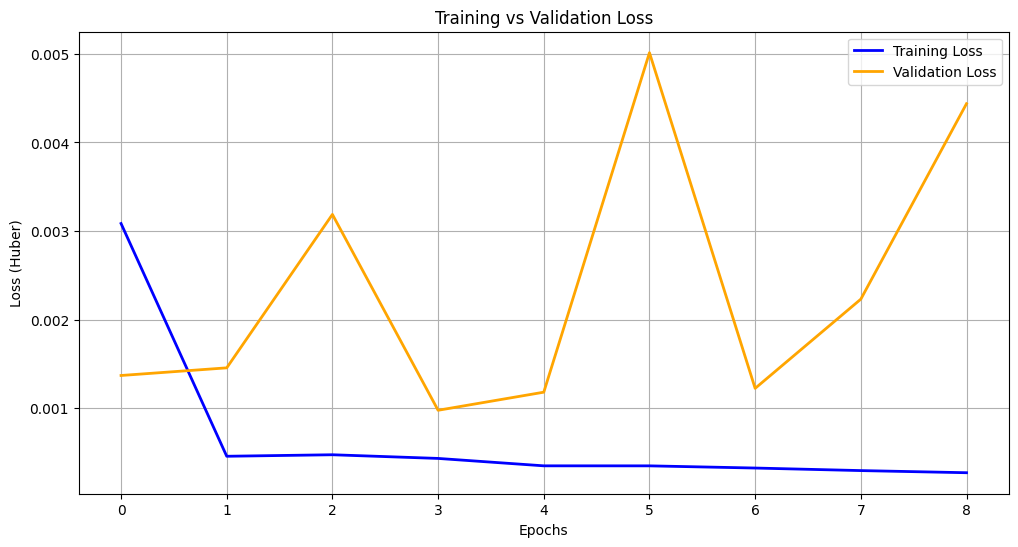

In [74]:
# Plot training vs validation loss
plt.figure(figsize=(12, 6))
plt.plot(history_lstm.history['loss'], label='Training Loss', color='blue', linewidth=2)
plt.plot(history_lstm.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Huber)')
plt.legend()
plt.grid(True)
plt.show()


### GRU

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build the GRU model
model_gru = Sequential([
    # First GRU layer with 256 units and return_sequences=True
    GRU(256, return_sequences=True, input_shape=(N, X_train_scaled_lstm.shape[2])),
    Dropout(0.3),  # Dropout to reduce overfitting

    # Second GRU layer with 256 units and return_sequences=False
    GRU(256, return_sequences=False),
    Dropout(0.3),  # Dropout to reduce overfitting

    # Fully connected dense layers
    Dense(128, activation='relu'),  # Dense layer with ReLU activation
    Dense(1)  # Output layer predicting the 'Close' price
])

# Compile the GRU model
model_gru.compile(
    optimizer=Adam(learning_rate=0.001),  # Learning rate for the optimizer
    loss='huber',      # Huber loss for regression (robust to outliers)
    metrics=['mae']    # Mean Absolute Error (MAE) as a performance metric
)

# Display the GRU model summary
model_gru.summary()


/Users/work/Library/Python/3.10/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 100, 256)       │       201,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 256)            │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 628,993 (2.40 MB)

 Trainable params: 628,993 (2.40 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Stop training after 5 epochs without improvement
    restore_best_weights=True
)

# Train the GRU model
history_gru = model_gru.fit(
    X_train_scaled, y_train_scaled,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_scaled, y_val_scaled),
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 22s 208ms/step - loss: 0.0090 - mae: 0.0729 - val_loss: 7.4963e-04 - val_mae: 0.0318
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - loss: 3.4675e-04 - mae: 0.0182 - val_loss: 5.9371e-04 - val_mae: 0.0246
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 23s 233ms/step - loss: 5.0652e-04 - mae: 0.0215 - val_loss: 6.2970e-04 - val_mae: 0.0282
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 24s 238ms/step - loss: 3.5318e-04 - mae: 0.0181 - val_loss: 5.0084e-04 - val_mae: 0.0237
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - loss: 3.9909e-04 - mae: 0.0196 - val_loss: 0.0040 - val_mae: 0.0843
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 20s 205ms/step - loss: 2.6326e-04 - mae: 0.0156 - val_loss: 0.0018 - val_mae: 0.0542
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 22s 221ms/step - loss: 2.5045e-04 - mae: 0.0151 - val_loss: 4.7597e-04 - val_mae: 0.0228
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 20s 206ms/step - loss: 2.9032e-04 - mae: 0.0161 - val_loss: 0.0010 - val_mae: 0.0385


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0050 - mae: 0.0756
GRU Test Loss: 0.0076, Test MAE: 0.0978
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step


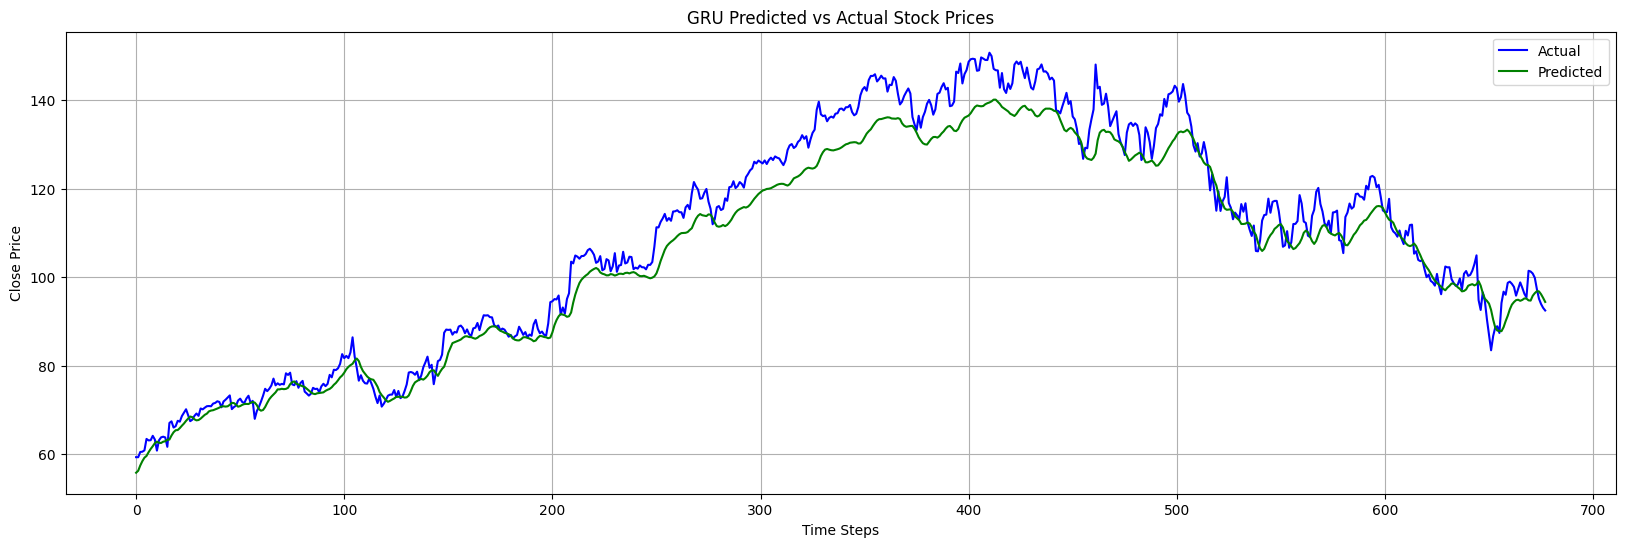

In [79]:
# Evaluate the GRU model on the test set
test_loss_gru, test_mae_gru = model_gru.evaluate(X_test_scaled, y_test_scaled)
print(f"GRU Test Loss: {test_loss_gru:.4f}, Test MAE: {test_mae_gru:.4f}")

# Predict on the test set
y_pred_gru_scaled = model_gru.predict(X_test_scaled)
y_pred_gru = scaler_y_lstm.inverse_transform(y_pred_gru_scaled)

# Plot predicted vs actual values
y_test_actual_gru = scaler_y_lstm.inverse_transform(y_test_scaled)

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(y_test_actual_gru, label='Actual', color='blue')
plt.plot(y_pred_gru, label='Predicted', color='green')
plt.title('GRU Predicted vs Actual Stock Prices')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


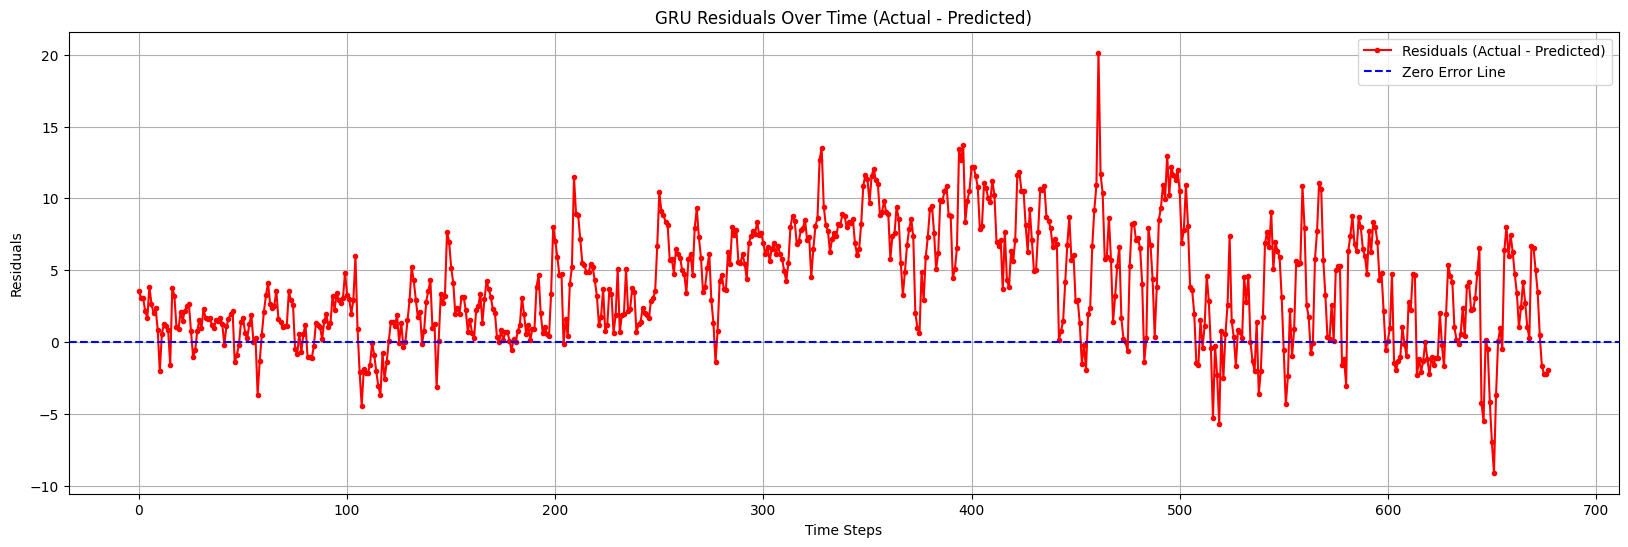

In [80]:
# Calculate residuals (Actual - Predicted)
residuals_gru = y_test_actual_gru - y_pred_gru

# Plot residuals over time
plt.figure(figsize=(20, 6))
plt.plot(residuals_gru, label='Residuals (Actual - Predicted)', color='red', linestyle='-', marker='o', markersize=3)
plt.axhline(0, color='blue', linestyle='--', linewidth=1.5, label='Zero Error Line')  # Horizontal line at zero
plt.title('GRU Residuals Over Time (Actual - Predicted)')
plt.xlabel('Time Steps')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()


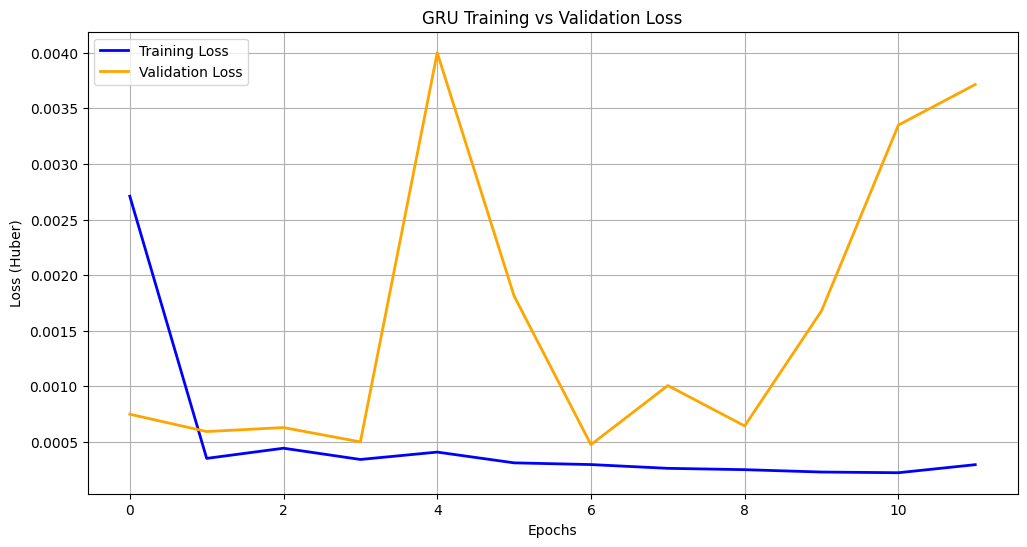

In [81]:
# Plot training vs validation loss for the GRU model
plt.figure(figsize=(12, 6))
plt.plot(history_gru.history['loss'], label='Training Loss', color='blue', linewidth=2)
plt.plot(history_gru.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
plt.title('GRU Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Huber)')
plt.legend()
plt.grid(True)
plt.show()


### gru modified

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build the GRU model
model_gru_high_params = Sequential([
    # First GRU layer with 512 units and return_sequences=True
    GRU(512, return_sequences=True, input_shape=(N, X_train_scaled.shape[2])),
    Dropout(0.3),  # Dropout to reduce overfitting
    
    # Second GRU layer with 512 units and return_sequences=True
    GRU(512, return_sequences=True),
    Dropout(0.3),
    
    # Third GRU layer with 256 units and return_sequences=True
    GRU(256, return_sequences=True),
    Dropout(0.3),
    
    # Fourth GRU layer with 256 units and return_sequences=False
    GRU(256, return_sequences=False),
    Dropout(0.3),
    
    # Fully connected dense layers
    Dense(512, activation='relu'),  # First dense layer with 512 units
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(256, activation='relu'),  # Second dense layer with 256 units
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(1)  # Output layer predicting the 'Close' price
])

# Compile the GRU model with modified learning rate
model_gru_high_params.compile(
    optimizer=Adam(learning_rate=0.0005),  # Reduced learning rate for larger models
    loss='huber',
    metrics=['mae']
)

# Display the GRU model summary
model_gru_high_params.summary()


/Users/work/Library/Python/3.10/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_16 (GRU)                    │ (None, 100, 512)       │       795,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 100, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_17 (GRU)                    │ (None, 100, 512)       │     1,575,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 100, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_18 (GRU)                    │ (None, 100, 256)       │       591,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_19 (GRU)                    │ (None, 256)            │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_65 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,620,865 (13.81 MB)

 Trainable params: 3,620,865 (13.81 MB)

 Non-trainable params: 0 (0.00 B)

In [98]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=7,  # Increased patience for the larger model
    restore_best_weights=True
)

# Train the model
history_gru_high_params = model_gru_high_params.fit(
    X_train_scaled, y_train_scaled,
    epochs=100,
    batch_size=64,  # Larger batch size for computational efficiency
    validation_data=(X_val_scaled, y_val_scaled),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - loss: 7.7418e-04 - mae: 0.0271 - val_loss: 9.1986e-04 - val_mae: 0.0357
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - loss: 7.4073e-04 - mae: 0.0261 - val_loss: 0.0018 - val_mae: 0.0533
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - loss: 7.3489e-04 - mae: 0.0272 - val_loss: 0.0015 - val_mae: 0.0482
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - loss: 6.3858e-04 - mae: 0.0247 - val_loss: 0.0028 - val_mae: 0.0687
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - loss: 7.5869e-04 - mae: 0.0262 - val_loss: 0.0166 - val_mae: 0.1773
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - loss: 6.7490e-04 - mae: 0.0254 - val_loss: 0.0027 - val_mae: 0.0667
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - loss: 7.0924e-04 - mae: 0.0269 - val_loss: 0.0111 - val_mae: 0.1443
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - loss: 7.8847e-04 - mae: 0.0281 - val_loss: 0.0020 - val_mae: 0.0562


In [93]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=7,  # Increased patience for the larger model
    restore_best_weights=True
)
history_gru_high_params = model_gru_high_params.fit(
    X_train_scaled, y_train_scaled,
    epochs=100,  # Total epochs
    batch_size=64,  # Batch size
    validation_data=(X_val_scaled, y_val_scaled),  # Validation set
    callbacks=[early_stopping],  # Early stopping callback
    verbose=1
)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - loss: 0.0010 - mae: 0.0317 - val_loss: 0.0048 - val_mae: 0.0903
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - loss: 9.4472e-04 - mae: 0.0300 - val_loss: 0.0015 - val_mae: 0.0464
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - loss: 9.1195e-04 - mae: 0.0304 - val_loss: 0.0042 - val_mae: 0.0846
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - loss: 7.9851e-04 - mae: 0.0283 - val_loss: 0.0015 - val_mae: 0.0470
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - loss: 7.4299e-04 - mae: 0.0265 - val_loss: 0.0085 - val_mae: 0.1245
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - loss: 7.3464e-04 - mae: 0.0263 - val_loss: 9.9391e-04 - val_mae: 0.0372
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 496s 10s/step - loss: 7.1804e-04 - mae: 0.0262 - val_loss: 0.0020 - val_mae: 0.0558
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - loss: 7.1365e-04 - mae: 0.0263 - val_loss: 9.4425e-04 - val_mae: 0.0359
Epoch 9/100
50/50 ━━━━━━━━

In [94]:
# Evaluate the model on the test set
test_loss_gru_high_params, test_mae_gru_high_params = model_gru_high_params.evaluate(X_test_scaled, y_test_scaled)
print(f"High-Parameter GRU Test Loss: {test_loss_gru_high_params:.4f}, Test MAE: {test_mae_gru_high_params:.4f}")


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 225ms/step - loss: 0.0090 - mae: 0.1069
High-Parameter GRU Test Loss: 0.0136, Test MAE: 0.1374


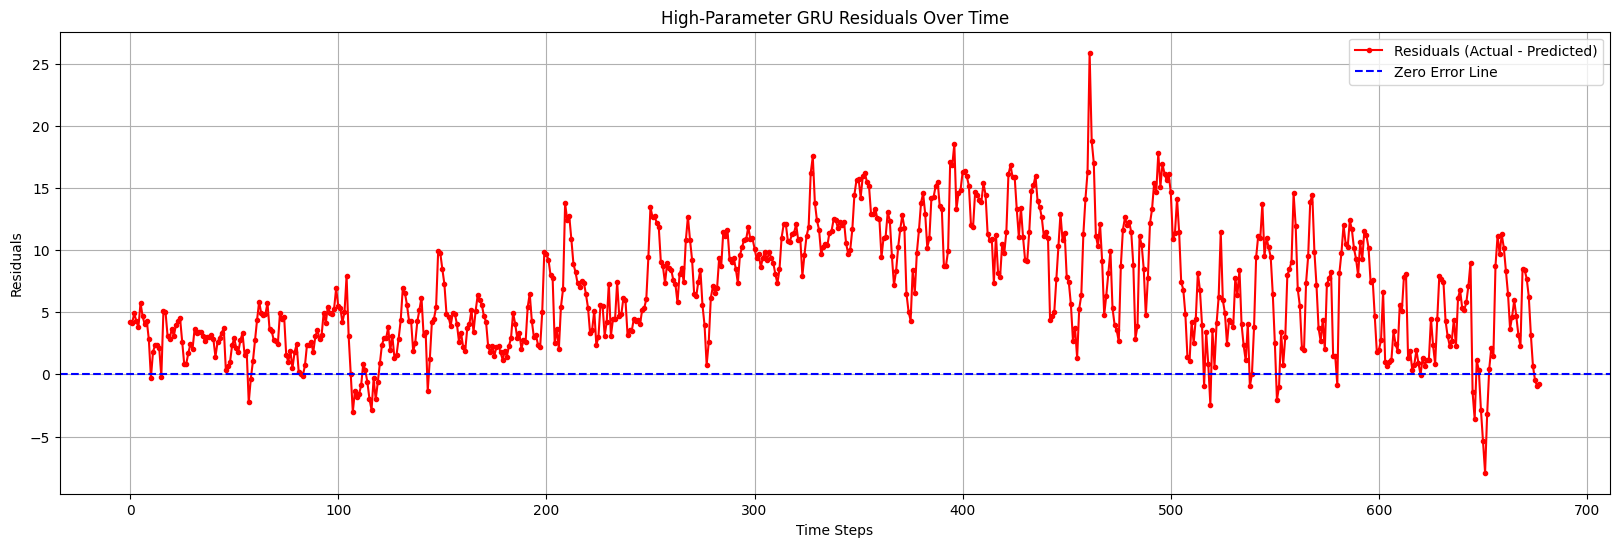

In [96]:
# Calculate residuals
residuals_gru_high_params = y_test_actual_gru_high_params - y_pred_gru_high_params

# Plot residuals
plt.figure(figsize=(20, 6))
plt.plot(residuals_gru_high_params, label='Residuals (Actual - Predicted)', color='red', linestyle='-', marker='o', markersize=3)
plt.axhline(0, color='blue', linestyle='--', linewidth=1.5, label='Zero Error Line')
plt.title('High-Parameter GRU Residuals Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step


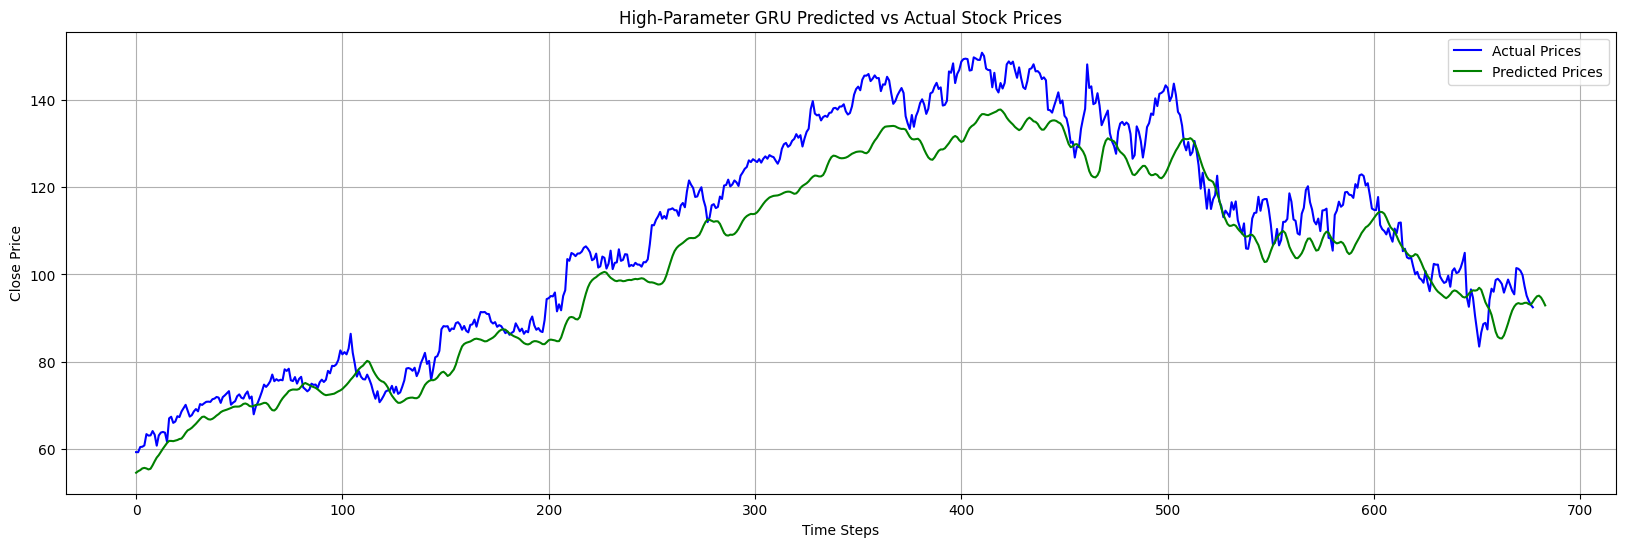

In [97]:
# Predict on the test set
y_pred_gru_high_params_scaled = model_gru_high_params.predict(X_test_scaled_lstm)
y_pred_gru_high_params = scaler_y_lstm.inverse_transform(y_pred_gru_high_params_scaled)
y_test_actual_gru_high_params = scaler_y_lstm.inverse_transform(y_test_scaled_lstm)

# Plot predicted vs actual values
plt.figure(figsize=(20, 6))
plt.plot(y_test_actual_gru_high_params, label='Actual Prices', color='blue')
plt.plot(y_pred_gru_high_params, label='Predicted Prices', color='green')
plt.title('High-Parameter GRU Predicted vs Actual Stock Prices')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


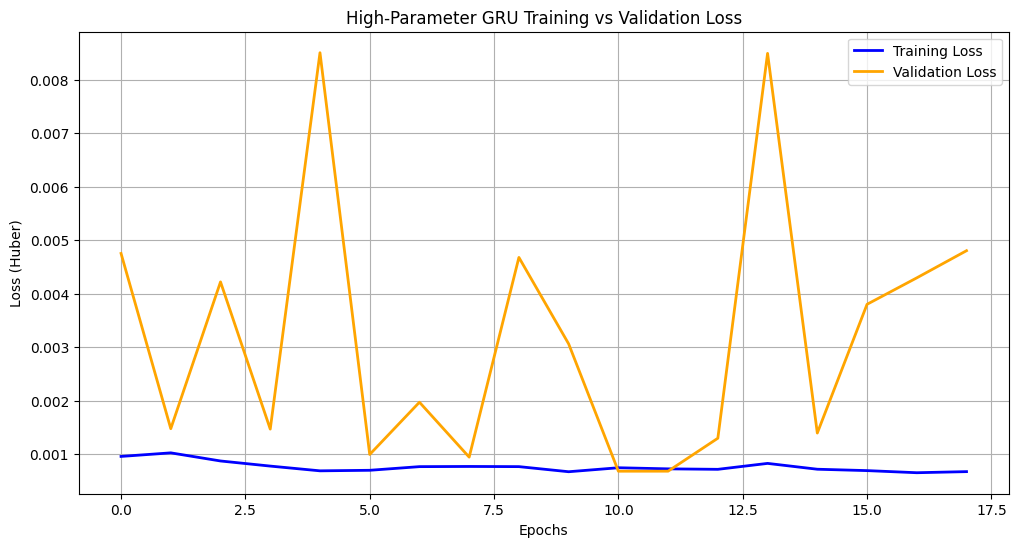

In [95]:
plt.figure(figsize=(12, 6))
plt.plot(history_gru_high_params.history['loss'], label='Training Loss', color='blue', linewidth=2)
plt.plot(history_gru_high_params.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
plt.title('High-Parameter GRU Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Huber)')
plt.legend()
plt.grid(True)
plt.show()
